# TP3 - Machine Learning
El objetivo de este trabajo es desarrollar y evaluar modelos basados en redes neuronales,incorporando técnicas de ablación para entender el impacto de diversas modificaciones en el proceso de entrenamiento y en la capacidad de generalización del modelo. No se permite usar librerías de machine learning como scikit-learn o PyTorch, a menos que sea pedido explícitamente en el enunciado del ejercicio.

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import importlib

In [82]:
import sys
import os
np.random.seed(122404)
# sys.path.append('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/src')
sys.path.append(os.path.abspath('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/src'))

In [83]:
import models as md
importlib.reload(md)
import data_splitting as ds
importlib.reload(ds)
import metricas as mt
importlib.reload(mt)
import auxiliares as aux
importlib.reload(aux)

<module 'auxiliares' from 'c:\\Users\\felic\\OneDrive\\Documentos\\GitHub\\MLyDL_TPs\\Marolda_Felicitas_TP3\\src\\auxiliares.py'>

In [84]:
# Cargar los archivos .npy
X_COMP = np.load(r'c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/data/X_COMP.npy')
X_images = np.load(r'c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/data/X_images.npy')
y_images = np.load(r'c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/data/y_images.npy')

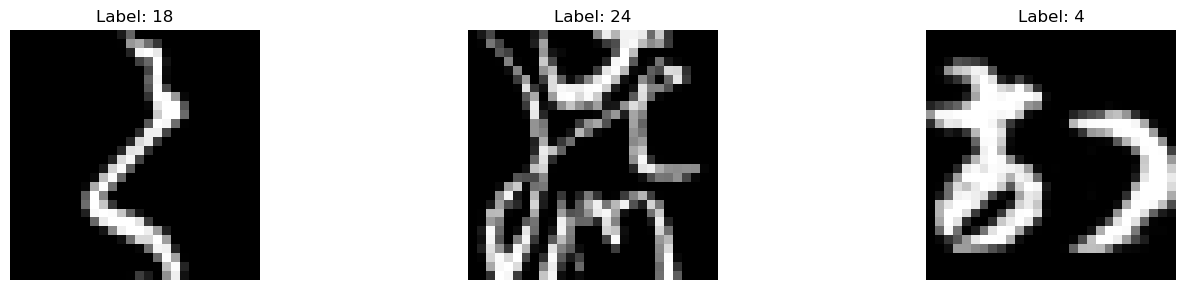

In [85]:
# Choose random pictures from X_images
num_images_to_display = 3
random_indices = np.random.choice(len(X_images), num_images_to_display, replace=False)

plt.figure(figsize=(15, 3))

for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(X_images[idx].reshape(28, 28), cmap='gray')  # Assuming images are 28x28
    plt.title(f"Label: {y_images[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Dividir el conjunto de datos en tres subconjuntos: Train, Validation y Test

In [132]:
importlib.reload(ds)

# Split the data into train and temp (temporary set for further splitting)
X_train, X_val, X_test, y_train, y_val, y_test = ds.split_data(X_images, y_images)
X_train = ds.normalize(X_train)  # Normaliza train
X_val = ds.normalize(X_val)      # Aplica misma normalización a val
X_test = ds.normalize(X_test)


# Check for overlapping samples between X_train and X_val
has_duplicates = np.any([np.array_equal(x, y) for x in X_train for y in X_val])
print(f"Hay muestras repetidas entre X_train y X_val? {has_duplicates}")


print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")



Hay muestras repetidas entre X_train y X_val? False
X_train shape: (3000, 784)
X_val shape: (1000, 784)
X_test shape: (1000, 784)


### 2) Implementación y Entrenamiento de una Red Neuronal Básica
- Implementar una red neuronal con L capas ocultas cada con M(l) nodos con función de activación ReLU (en las capas ocultas) y activación softmax para la capa de salida.
- Implementar un algoritmo para entrenar dicha red, mediante backpropagation y gradiente descendiente estándar, utilizando como función de costo la cross-entropy.

NOTA: El algoritmo backpropagation debe sera adaptado para el caso de clasificación multi-clase con función de activación softmax para la capa de salida y función de costo cross-entropy.

- Entrenar una red neuronal con 2 capas ocultas, con 100 y 80 nodos respectivamente, y graficar la evolución de la función de costo (cross-entropy) sobre los conjuntos de entrenamiento y validación a lo largo de las épocas. Llamaremos a este modelo M0

Epoch 0, Loss: 4.011714871685142
loss val: 1.3366634623886713
Epoch 10, Loss: 3.7937602782856454
loss val: 1.276053419104105
Epoch 20, Loss: 3.65606514605996
loss val: 1.2408005499927657
Epoch 30, Loss: 3.5026947126203054
loss val: 1.2001908604674083
Epoch 40, Loss: 3.321470454228951
loss val: 1.1500316265811508
Epoch 50, Loss: 3.1095221122135603
loss val: 1.0895999709273638
Epoch 60, Loss: 2.877384035765197
loss val: 1.0225882261209878
Epoch 70, Loss: 2.6476737046346015
loss val: 0.9552127666528871
Epoch 80, Loss: 2.441694184055507
loss val: 0.8957845528884552
Epoch 90, Loss: 2.2641578868503722
loss val: 0.8463680406933611
Epoch 100, Loss: 2.112114106092578
loss val: 0.805369444905057
Epoch 110, Loss: 1.982267100258831
loss val: 0.7715093360589332
Epoch 120, Loss: 1.870883846463221
loss val: 0.7435527594693645
Epoch 130, Loss: 1.7742170147032135
loss val: 0.7202021219075473
Epoch 140, Loss: 1.6893846871168519
loss val: 0.7002441552330468
Epoch 150, Loss: 1.6138036537550604
loss val: 0

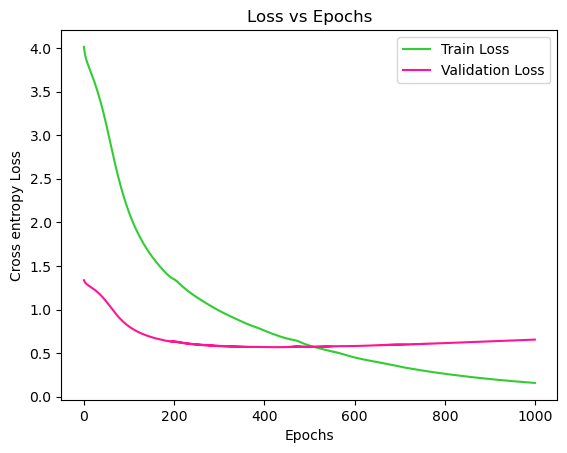

In [127]:
importlib.reload(md)

m0 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "softmax"], [100,80])


Reportar las siguientes métricas de performance, sobre los conjuntos de entrenamiento
y validación, para el modelo base entrenado:
- Accuracy
- Cross-Entropy
- Matriz de Confusión

Accuracy: 0.5870
Cross Entropy: 1.9668


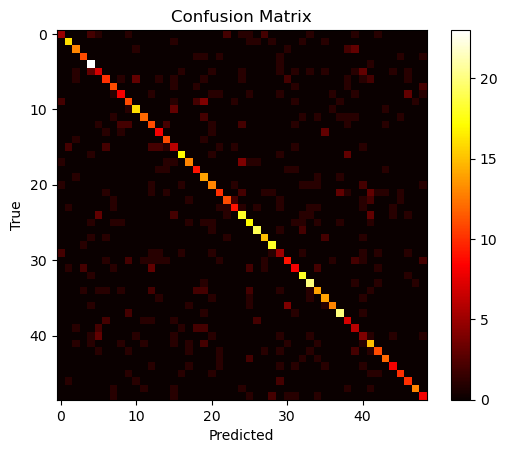

In [88]:
importlib.reload(mt)
y_pred_val = m0.forward_pass(X_val, False)
get_metrics = mt.get_metrics(y_pred_val, y_val)

### 3) Implementación y Entrenamiento de una Red Neuronal Avanzada

Implementar las siguientes mejoras al algoritmo de entrenamiento, y para cada una reportar el efecto observado sobre el tiempo de entrenamiento y la performance del modelo resultante.
- Rate scheduling lineal (con saturación) y exponencial.
- Mini-batch stochastic gradient descent.
- Optimizador ADAM.
- Regularización L2.
- Regularización mediante early stopping.
- OPCIONAL: Regularización mediante dropout.
- OPCIONAL: batch normalization.


In [89]:
funciones_de_activacion = ["ReLU", "ReLU", "softmax"]
nodos_por_capa = [100, 80]

Epoch 0, Loss: 3.9755400046716374
loss val: 1.3323479273524452
Epoch 10, Loss: 3.729194361858526
loss val: 1.2608416679359256
Epoch 20, Loss: 3.5482241024066594
loss val: 1.2105508975783468
Epoch 30, Loss: 3.3435493429284526
loss val: 1.1540564409475587
Epoch 40, Loss: 3.11630124382381
loss val: 1.0893914732371917
Epoch 50, Loss: 2.8834310863661807
loss val: 1.0207974697236784
Epoch 60, Loss: 2.663891328647746
loss val: 0.9558051508066092
Epoch 70, Loss: 2.470803444505647
loss val: 0.899724155227048
Epoch 80, Loss: 2.304983183125121
loss val: 0.8533613235195722
Epoch 90, Loss: 2.164054560527029
loss val: 0.8155654135100552
Epoch 100, Loss: 2.0441917986066294
loss val: 0.7848194849266538
Epoch 110, Loss: 1.9410425762306835
loss val: 0.7592392187927164
Epoch 120, Loss: 1.851081755610132
loss val: 0.7377736037103187
Epoch 130, Loss: 1.7716737907078657
loss val: 0.7196539245680674
Epoch 140, Loss: 1.7011119557781706
loss val: 0.7043337561712759
Epoch 150, Loss: 1.6377464497096594
loss val:

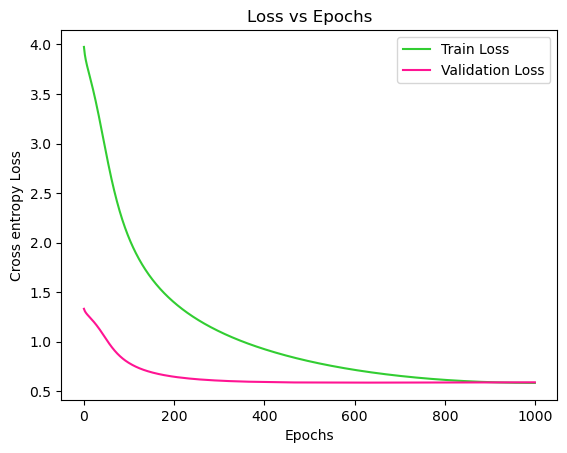

Accuracy: 0.5770
Cross Entropy: 1.7705


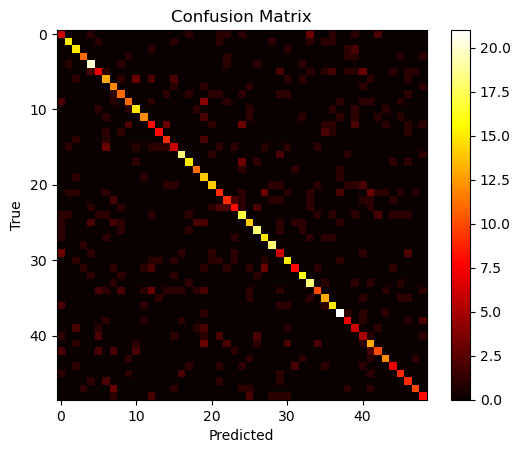

In [90]:
importlib.reload(md)
mejora = {}
mejora["Rate scheduling lineal"] = 0.001
rsl = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(rsl.forward_pass(X_val, False), y_val)


Epoch 0, Loss: 3.9839544733431405
loss val: 1.3268360501094587
Epoch 10, Loss: 3.798955978558131
loss val: 1.2786055362060307
Epoch 20, Loss: 3.6909942366332418
loss val: 1.2495150491091456
Epoch 30, Loss: 3.583858455514402
loss val: 1.2200706387187479
Epoch 40, Loss: 3.473082382967558
loss val: 1.190016831634791
Epoch 50, Loss: 3.3566982166639323
loss val: 1.1574511381589978
Epoch 60, Loss: 3.2394787784996963
loss val: 1.1241394797295272
Epoch 70, Loss: 3.1288445320184866
loss val: 1.0930357854026225
Epoch 80, Loss: 3.027465950287173
loss val: 1.0647086793784915
Epoch 90, Loss: 2.9364844547115014
loss val: 1.039386357653185
Epoch 100, Loss: 2.8555333269358347
loss val: 1.016608382923287
Epoch 110, Loss: 2.7833120943520195
loss val: 0.9962788510594245
Epoch 120, Loss: 2.7195135066039073
loss val: 0.9784583191165159
Epoch 130, Loss: 2.6630825150611774
loss val: 0.9628110589986614
Epoch 140, Loss: 2.6132707369000667
loss val: 0.9490020469963335
Epoch 150, Loss: 2.569332899676732
loss val

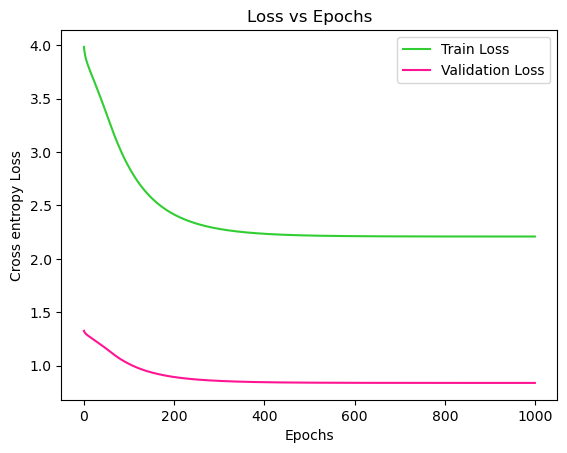

Accuracy: 0.3870
Cross Entropy: 2.5170


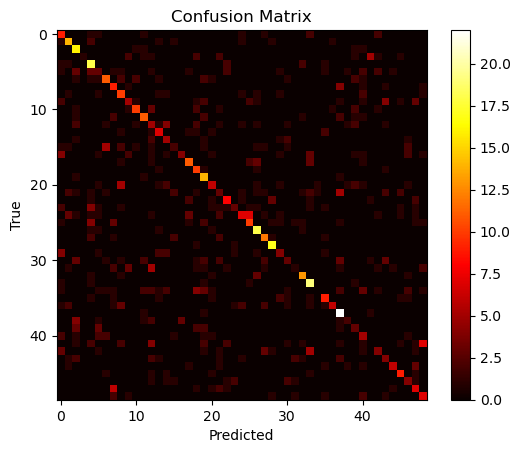

In [92]:
# Learning rate scheduling exponencial
importlib.reload(md)
mejora = {}
mejora["Rate scheduling exponencial"] = 0.99    # decay rate
rsl = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(rsl.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 3.2193539271334854
loss val: 1.1120027443118243
Epoch 10, Loss: 0.7366429512302183
loss val: 0.596678187301675
Epoch 20, Loss: 0.21937805458813106
loss val: 0.620979703033263
Epoch 30, Loss: 0.07331091724637964
loss val: 0.7099139825393465
Epoch 40, Loss: 0.030383488564820933
loss val: 0.7541737408817393
Epoch 50, Loss: 0.01881270717703487
loss val: 0.7919764167315251
Epoch 60, Loss: 0.013334229840185606
loss val: 0.8238544244318325
Epoch 70, Loss: 0.010143994860030835
loss val: 0.8439618788129857
Epoch 80, Loss: 0.008092706051283857
loss val: 0.8609528798399821
Epoch 90, Loss: 0.006712291090979755
loss val: 0.8781057557545605
Epoch 100, Loss: 0.005717269751886236
loss val: 0.8921278345462893
Epoch 110, Loss: 0.00494020070588484
loss val: 0.9017943855746489
Epoch 120, Loss: 0.004347906499556501
loss val: 0.911684644978456
Epoch 130, Loss: 0.0038741295290177728
loss val: 0.9217016683272735
Epoch 140, Loss: 0.003485696264009191
loss val: 0.9310086611942253
Epoch 150, Loss:

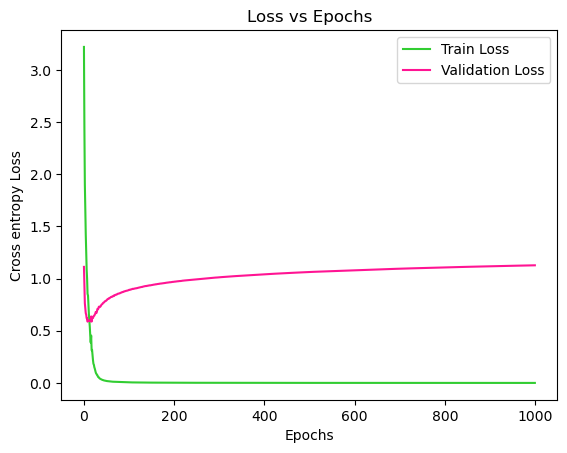

Accuracy: 0.5810
Cross Entropy: 3.6268


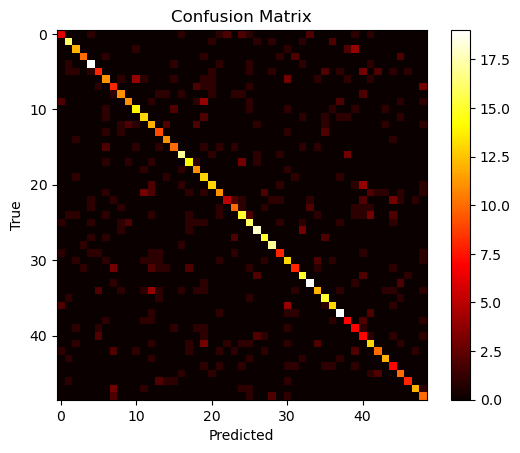

In [93]:
importlib.reload(md)
mejora = {}
mejora["Mini batch stochastic gradient descent"] = 64
minibatch_sgd = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(minibatch_sgd.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 2.9248981341133633
loss val: 1.0315154520373213
Epoch 10, Loss: 0.43106703777564137
loss val: 0.5706556981803738
Epoch 20, Loss: 0.09950550844748365
loss val: 0.642002917092559
Epoch 30, Loss: 0.02976439313494313
loss val: 0.7253893039854824
Epoch 40, Loss: 0.012805417243002602
loss val: 0.7882294988458635
Epoch 50, Loss: 0.006926731354544093
loss val: 0.8324406159480308
Epoch 60, Loss: 0.004175334146766218
loss val: 0.8707015544127178
Epoch 70, Loss: 0.002702246973231327
loss val: 0.9037931336435749
Epoch 80, Loss: 0.0018270703240276826
loss val: 0.9338119166227219
Epoch 90, Loss: 0.0012995547550247388
loss val: 0.962492617342163
Epoch 100, Loss: 0.0009055435434085271
loss val: 0.9856078774359118
Epoch 110, Loss: 0.0006540363527424303
loss val: 1.0083762023029579
Epoch 120, Loss: 0.0004777950103284357
loss val: 1.0285618802897452
Epoch 130, Loss: 0.0003532801822467054
loss val: 1.0483236486266825
Epoch 140, Loss: 0.0002610910782398764
loss val: 1.069011338801394
Epoch 1

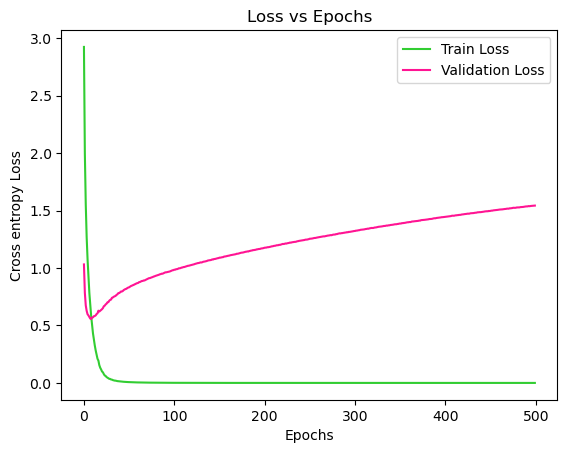

Accuracy: 0.5660
Cross Entropy: 5.8555


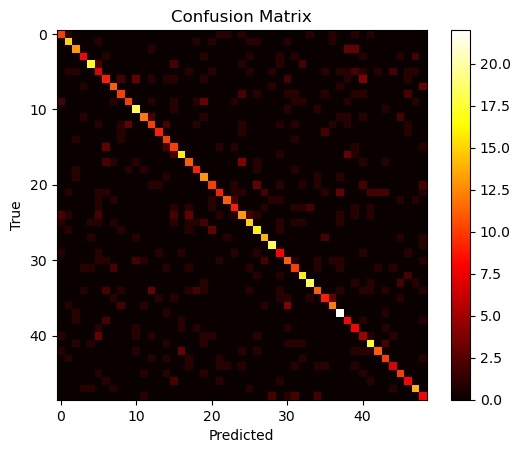

In [159]:
# ADAM
importlib.reload(md)
mejora = {}
mejora["ADAM"] = [0.9, 0.999, 1e-8]
mejora["Mini batch stochastic gradient descent"] = 64
adam = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora, 0.001, 500)
get_metrics = mt.get_metrics(adam.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 3.9531330741854735
loss val: 1.3261645785671208
Epoch 10, Loss: 3.7977470815295202
loss val: 1.281233714551864
Epoch 20, Loss: 3.673840094200766
loss val: 1.2479531938778037
Epoch 30, Loss: 3.5202545610358165
loss val: 1.206736153313315
Epoch 40, Loss: 3.3323642194625114
loss val: 1.1559680264201677
Epoch 50, Loss: 3.11140872231357
loss val: 1.0935266192313937
Epoch 60, Loss: 2.8715998256774107
loss val: 1.0246387397222667
Epoch 70, Loss: 2.63561169697429
loss val: 0.9569268811671913
Epoch 80, Loss: 2.4250610978515748
loss val: 0.8970859422797077
Epoch 90, Loss: 2.246480312113346
loss val: 0.8475561634340715
Epoch 100, Loss: 2.0972863461408995
loss val: 0.8072421535140816
Epoch 110, Loss: 1.9713198201156008
loss val: 0.7741459410147586
Epoch 120, Loss: 1.8631295904029175
loss val: 0.7466995106145222
Epoch 130, Loss: 1.7688819822651074
loss val: 0.7236611012292813
Epoch 140, Loss: 1.6860541734816592
loss val: 0.7042879760173205
Epoch 150, Loss: 1.6126492499422609
loss val

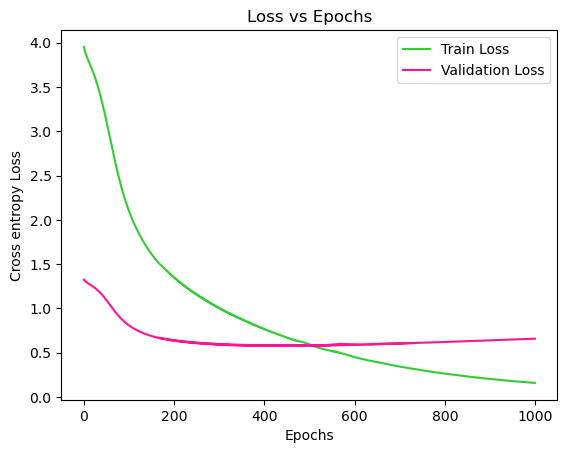

Accuracy: 0.5770
Cross Entropy: 1.9741


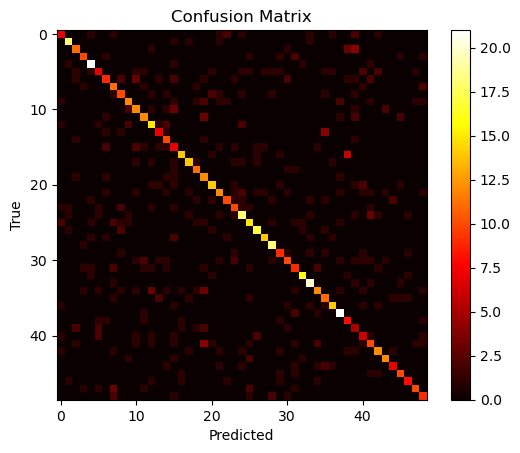

In [95]:
# regularización L2
importlib.reload(md)
mejora = {}
mejora["L2"] = 0.01
l2 = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(l2.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 3.95739336936552
loss val: 1.3184793153590062
Epoch 10, Loss: 3.7878936670247163
loss val: 1.2709286383304819
Epoch 20, Loss: 3.6435949692567764
loss val: 1.2320016314712148
Epoch 30, Loss: 3.4666579824815673
loss val: 1.1834305930575675
Epoch 40, Loss: 3.253140277204527
loss val: 1.1232635392639014
Epoch 50, Loss: 3.0055961879720914
loss val: 1.054173405093221
Epoch 60, Loss: 2.7556896463651066
loss val: 0.9841114712082186
Epoch 70, Loss: 2.5306207201651247
loss val: 0.9220186852696236
Epoch 80, Loss: 2.338464892358206
loss val: 0.869650693351404
Epoch 90, Loss: 2.1766930437667686
loss val: 0.8267343557142849
Epoch 100, Loss: 2.04037265049477
loss val: 0.7911937562757292
Epoch 110, Loss: 1.923597273189647
loss val: 0.7618805414307778
Epoch 120, Loss: 1.8222485023015949
loss val: 0.7375011419265446
Epoch 130, Loss: 1.7329684378185746
loss val: 0.7167658798792774
Epoch 140, Loss: 1.6533406073445498
loss val: 0.6990405935248535
Epoch 150, Loss: 1.5821385250917939
loss val:

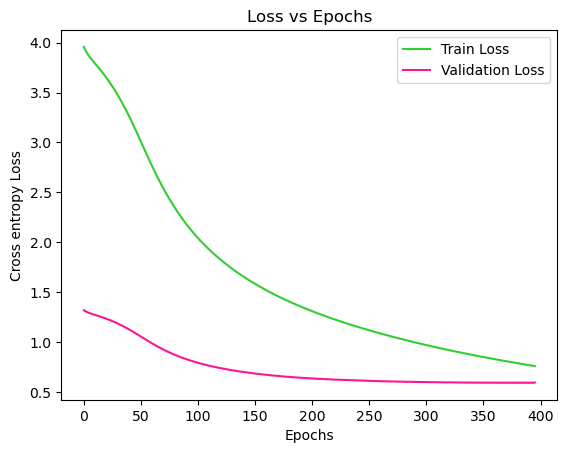

Accuracy: 0.5480
Cross Entropy: 1.7823


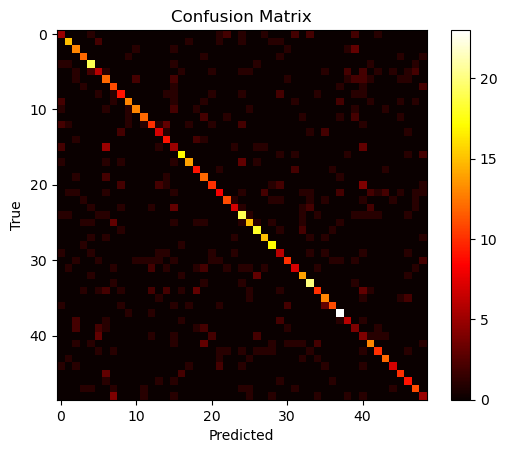

In [96]:
# Early stopping
importlib.reload(md)
mejora = {}
mejora["Early stopping"] = 5
early_stopping = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)

get_metrics = mt.get_metrics(early_stopping.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 3.9399456270090303
loss val: 1.3148032826274385
Epoch 10, Loss: 3.8277772649938786
loss val: 1.2812419639600114
Epoch 20, Loss: 3.7992774267127247
loss val: 1.273650020798214
Epoch 30, Loss: 3.770025943850666
loss val: 1.2656308914884635
Epoch 40, Loss: 3.7382807641403724
loss val: 1.2570319872399973
Epoch 50, Loss: 3.703818957016131
loss val: 1.2480556485351941
Epoch 60, Loss: 3.663579387357311
loss val: 1.2371005830282529
Epoch 70, Loss: 3.617700284234569
loss val: 1.2247937276451522
Epoch 80, Loss: 3.566746297428062
loss val: 1.2113996186219411
Epoch 90, Loss: 3.5133381931142122
loss val: 1.1971016239134065
Epoch 100, Loss: 3.461783234720316
loss val: 1.1832125388207735
Epoch 110, Loss: 3.4064112597503797
loss val: 1.1687179723901977
Epoch 120, Loss: 3.3512520494086213
loss val: 1.1544002318675552
Epoch 130, Loss: 3.294235214517058
loss val: 1.139427756886737
Epoch 140, Loss: 3.241210915362097
loss val: 1.1260186656114137
Epoch 150, Loss: 3.18569276131534
loss val: 1.

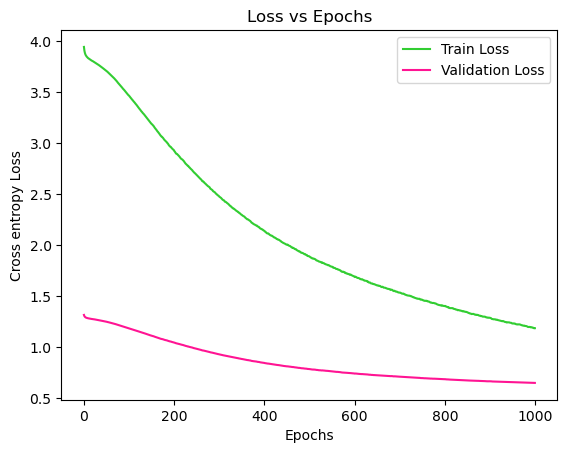

Accuracy: 0.5150
Cross Entropy: 1.9471


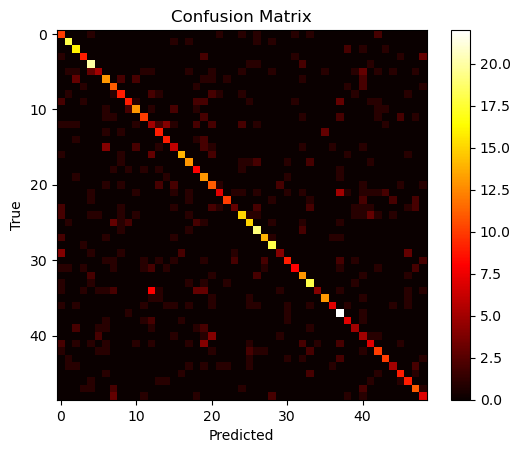

In [97]:
# dropout
importlib.reload(md)
mejora = {}
mejora["Dropout"] = 0.5
dropout = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(dropout.forward_pass(X_val, False), y_val)

In [98]:
# # batch normalization
# importlib.reload(md)
# mejoras = {}
# mejoras[] = 0.9
# batch_norm = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejoras)
# get_metrics = m"Batch normalization"t.get_metrics(batch_norm.forward_pass(X_val, False), y_val)

Explorar cambios en la arquitectura de la red (es decir, la cantidad de capas ocultas y unidades ocultas por capa), y los hiperparámetros (cada uno de los items en la lista anterior tiene una serie de parámetros que podemos variar), y determinar la configuración que funcione mejor (menor error de validación). Llamaremos a este modelo M1

In [99]:
mejoras = {}
mejoras["Early stopping"] = 5

Probamos siempre con early stopping para acortar el tiempo de entrenamiento evitando, además, el overfitting.

Epoch 0, Loss: 3.999900136674128
loss val: 1.3293241161861575
Epoch 10, Loss: 3.7706853023206106
loss val: 1.2628033985917224
Epoch 20, Loss: 3.620918266293376
loss val: 1.2216250375136675
Epoch 30, Loss: 3.4531023814700257
loss val: 1.1743312862040078
Epoch 40, Loss: 3.272707796715622
loss val: 1.1233699543284763
Epoch 50, Loss: 3.0890224744255104
loss val: 1.0712614419488364
Epoch 60, Loss: 2.9098733439830147
loss val: 1.0205975870211117
Epoch 70, Loss: 2.74332624407869
loss val: 0.9742289422750171
Epoch 80, Loss: 2.5925349898360808
loss val: 0.9320374053017325
Epoch 90, Loss: 2.458164177894707
loss val: 0.8946707528374256
Epoch 100, Loss: 2.3398066676643676
loss val: 0.862057449939995
Epoch 110, Loss: 2.235733380482718
loss val: 0.833618515215643
Epoch 120, Loss: 2.1437151860304993
loss val: 0.8090045080473238
Epoch 130, Loss: 2.0620161264284835
loss val: 0.7875827720147057
Epoch 140, Loss: 1.9888452167905641
loss val: 0.7688392416853583
Epoch 150, Loss: 1.9228932541955812
loss val:

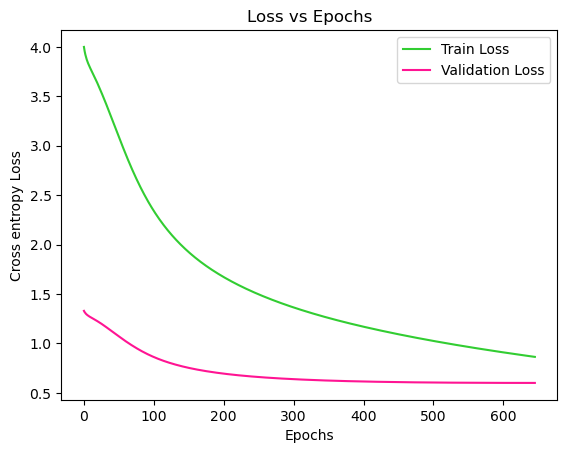

-------------------- 1 capa de 64 nodos --------------------
Accuracy: 0.5480
Cross Entropy: 1.8009


In [100]:
# una capa de 64 nodos
importlib.reload(md)
importlib.reload(mt)
m0 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "softmax"], [64], mejoras)
print("-"*20, "1 capa de 64 nodos", "-"*20)
mt.print_acc_ce(m0.forward_pass(X_val, False), y_val,)

Ya tenemos un modelo básico, ahora vamos a ver que pasa si le agregamos una capa.

Epoch 0, Loss: 3.97482464422752
loss val: 1.332423712129681
Epoch 10, Loss: 3.8321482651175276
loss val: 1.292556882478196
Epoch 20, Loss: 3.7383922714277062
loss val: 1.2726013456879046
Epoch 30, Loss: 3.647298184864111
loss val: 1.2518017103393306
Epoch 40, Loss: 3.5515981113571087
loss val: 1.2288063203815285
Epoch 50, Loss: 3.450830917713675
loss val: 1.2042182140306938
Epoch 60, Loss: 3.3471724740112676
loss val: 1.178131579225587
Epoch 70, Loss: 3.239595535808972
loss val: 1.1501372750577457
Epoch 80, Loss: 3.128051961249551
loss val: 1.1203081677681717
Epoch 90, Loss: 3.0105676165985145
loss val: 1.0886503940110213
Epoch 100, Loss: 2.8885417459183587
loss val: 1.0549901168801823
Epoch 110, Loss: 2.7636885319973934
loss val: 1.0196680670910483
Epoch 120, Loss: 2.639762878714109
loss val: 0.9841357154800113
Epoch 130, Loss: 2.5210739557573034
loss val: 0.9496786492689342
Epoch 140, Loss: 2.410519290197589
loss val: 0.9180006435076707
Epoch 150, Loss: 2.309949730201116
loss val: 0.

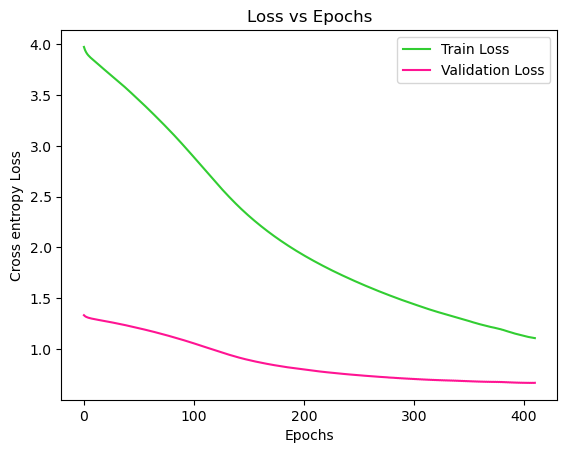

-------------------- 2 capas de 64 y 32 nodos --------------------
Accuracy: 0.5090
Cross Entropy: 1.9998


In [101]:
# 2 capas de 64 y 32 nodos
importlib.reload(md)
importlib.reload(mt)
m1 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "softmax"], [64, 32], mejoras)
print("-"*20, "2 capas de 64 y 32 nodos", "-"*20)
mt.print_acc_ce(m1.forward_pass(X_val, False), y_val,)

Vimos que no mejoró. Probamos mantener la cantidad de capas y aumentar la cantidad de neuronas por capa.

Epoch 0, Loss: 4.027895569588543
loss val: 1.3458511045094934
Epoch 10, Loss: 3.776388519207843
loss val: 1.2732077591281878
Epoch 20, Loss: 3.6118891660282704
loss val: 1.227334443312581
Epoch 30, Loss: 3.4131486722241657
loss val: 1.1714538771265837
Epoch 40, Loss: 3.178671324285927
loss val: 1.1052630105308898
Epoch 50, Loss: 2.9248008807351153
loss val: 1.0323615847115577
Epoch 60, Loss: 2.67856193768485
loss val: 0.9598029693087753
Epoch 70, Loss: 2.459250614264194
loss val: 0.8952880908544929
Epoch 80, Loss: 2.2732264811911236
loss val: 0.8422665001250302
Epoch 90, Loss: 2.1169411808356715
loss val: 0.7990478663308256
Epoch 100, Loss: 1.9851575401831887
loss val: 0.7637066753306838
Epoch 110, Loss: 1.8728471805515141
loss val: 0.7348603393275825
Epoch 120, Loss: 1.7750492842866457
loss val: 0.7108595665025459
Epoch 130, Loss: 1.689315808887943
loss val: 0.6908432581335529
Epoch 140, Loss: 1.6131117352693467
loss val: 0.6741494739072968
Epoch 150, Loss: 1.5449644720226785
loss val

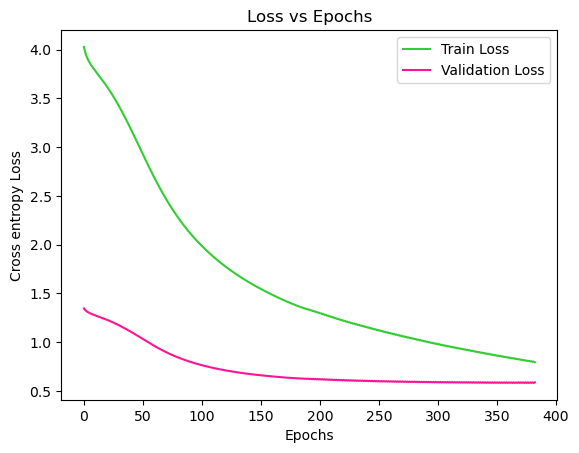

-------------------- 2 capas de 80 y 100 nodos --------------------
Accuracy: 0.5550
Cross Entropy: 1.7640


In [102]:
# [80, 100]
importlib.reload(md)
importlib.reload(mt)
m2 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "softmax"], [80, 100], mejoras)
print("-"*20, "2 capas de 80 y 100 nodos", "-"*20)
mt.print_acc_ce(m2.forward_pass(X_val, False), y_val,)

Como una sola capa era mejor que dos con pocas neuronas pero sube cuando son dos con más neuronas, probamos una sola capa con 200 neuronas.

Epoch 0, Loss: 4.033257152312371
loss val: 1.3494082176378706
Epoch 10, Loss: 3.7498464780833767
loss val: 1.2652299643614227
Epoch 20, Loss: 3.5419091405171863
loss val: 1.2041579602121215
Epoch 30, Loss: 3.33569432685803
loss val: 1.1442602434407507
Epoch 40, Loss: 3.1293543442416913
loss val: 1.0843804298411195
Epoch 50, Loss: 2.9283150182129383
loss val: 1.0258265803937603
Epoch 60, Loss: 2.7386303951003725
loss val: 0.9710214676309159
Epoch 70, Loss: 2.56656216579361
loss val: 0.9218560444130384
Epoch 80, Loss: 2.4138002577279942
loss val: 0.8786872026352691
Epoch 90, Loss: 2.2794354195096935
loss val: 0.8410516495040098
Epoch 100, Loss: 2.162071620070924
loss val: 0.8086861175097991
Epoch 110, Loss: 2.0592807603196945
loss val: 0.780771489625692
Epoch 120, Loss: 1.9691241888032813
loss val: 0.7566623669140161
Epoch 130, Loss: 1.889663700496944
loss val: 0.7358329267552002
Epoch 140, Loss: 1.8190989249437146
loss val: 0.7178432316791888
Epoch 150, Loss: 1.7559235253292287
loss val

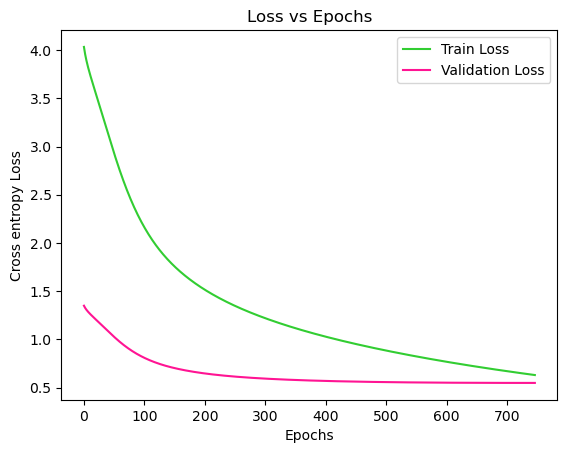

-------------------- 1 capa de 200 nodos --------------------
Accuracy: 0.5750
Cross Entropy: 1.6459


In [103]:
# una capa 200 neuronas
importlib.reload(md)
importlib.reload(mt)
m3 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "softmax"], [200], mejoras)
print("-"*20, "1 capa de 200 nodos", "-"*20)
mt.print_acc_ce(m3.forward_pass(X_val, False), y_val,)

Nos fue mejor con mas neuronas. Probamos muchas capas ocultas y muchas neuronas. Como oscilaba probamos sin early stopping a ver como continuaba. Probando la idea de "just add more layers".

Epoch 0, Loss: 3.9485833956564105
loss val: 1.3121043809015898
Epoch 10, Loss: 3.6691971628611793
loss val: 1.2422562643574016
Epoch 20, Loss: 3.3158367601389354
loss val: 1.1435513642520931
Epoch 30, Loss: 2.7764413458808472
loss val: 0.9879022861272287
Epoch 40, Loss: 2.85643348032823
loss val: 1.0130686301535181
Epoch 50, Loss: 2.208952543527554
loss val: 0.8469079328836113
Epoch 60, Loss: 1.9109365605157569
loss val: 0.763104640253987
Epoch 70, Loss: 1.7829826866373144
loss val: 0.7487816207659241
Epoch 80, Loss: 1.594556154605104
loss val: 0.7047403860184067
Epoch 90, Loss: 1.5298159774405424
loss val: 0.7062388751502107
Epoch 100, Loss: 1.3460149962831687
loss val: 0.6658945378114687
Epoch 110, Loss: 1.3437841074215673
loss val: 0.6667495806351504
Epoch 120, Loss: 1.1683301838602937
loss val: 0.6439740662976803
Epoch 130, Loss: 1.0998073659170908
loss val: 0.607477676328472
Epoch 140, Loss: 0.9124624809232871
loss val: 0.5659014930244046
Epoch 150, Loss: 0.9212881374383486
loss v

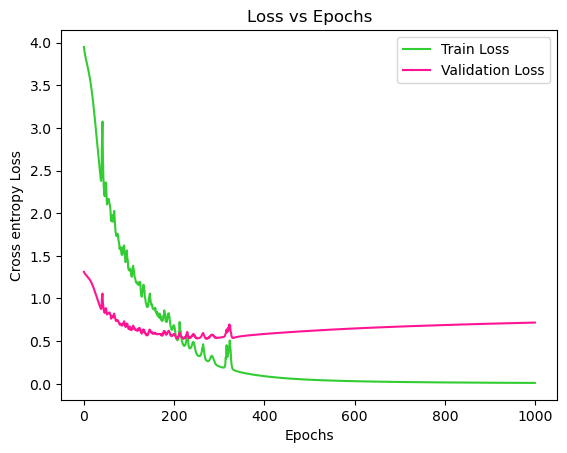

-------------------- 4 capas de [200, 250, 300, 500] nodos --------------------
Accuracy: 0.6180
Cross Entropy: 2.1727


In [104]:
# [200, 250, 300, 500]
importlib.reload(md)
importlib.reload(mt)
m3 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "ReLU", "ReLU", "softmax"], [200, 250, 300, 500])
print("-"*20, "4 capas de [200, 250, 300, 500] nodos", "-"*20)
mt.print_acc_ce(m3.forward_pass(X_val, False), y_val,)

Fue mejor que en los otros pero tardó mucho tiempo asi que probamos con 3 capas ocultas, aunque probablemente las oscilaciones se correlacionen con un alto learning rate, como tarda mucho tiempo, por "no free lunch" no se continua evaluando sobre esta cantidad de capas y neuronas.

Epoch 0, Loss: 4.031811155760588
loss val: 1.3553755584819527
Epoch 10, Loss: 3.838016514790675
loss val: 1.2985537688552506
Epoch 20, Loss: 3.7337969039492105
loss val: 1.2710829488366604
Epoch 30, Loss: 3.627363352945819
loss val: 1.2430200240115845
Epoch 40, Loss: 3.4975144483017346
loss val: 1.208451244169743
Epoch 50, Loss: 3.3371757502828574
loss val: 1.1644560275140836
Epoch 60, Loss: 3.147148043764966
loss val: 1.1107510301664238
Epoch 70, Loss: 2.9397373625637537
loss val: 1.0509779723788901
Epoch 80, Loss: 2.730791611570922
loss val: 0.9896598867997779
Epoch 90, Loss: 2.534919726231761
loss val: 0.9320375810702389
Epoch 100, Loss: 2.3609864737926247
loss val: 0.8808811121430649
Epoch 110, Loss: 2.2089644350704862
loss val: 0.836921102768669
Epoch 120, Loss: 2.0774895929590236
loss val: 0.7999922548451616
Epoch 130, Loss: 1.9637351262899227
loss val: 0.7689663931767694
Epoch 140, Loss: 1.8649106375465387
loss val: 0.74293456233299
Epoch 150, Loss: 1.777876392322436
loss val: 0

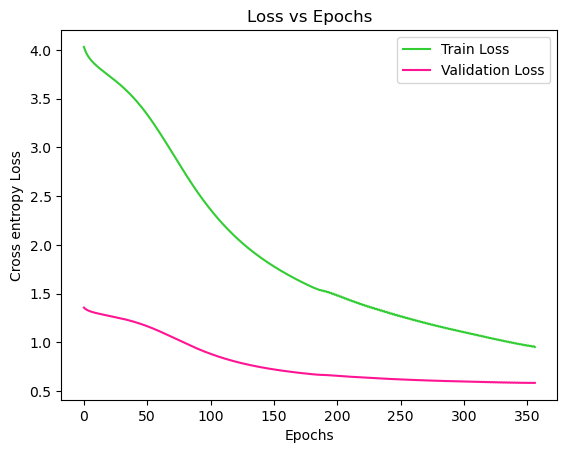

-------------------- 4 capas de [100, 200, 200] nodos --------------------
Accuracy: 0.5630
Cross Entropy: 1.7501


In [105]:
# [100, 200, 200]
importlib.reload(md)
importlib.reload(mt)
m3 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "ReLU", "softmax"], [100, 200, 200], mejoras, 0.05)
print("-"*20, "4 capas de [100, 200, 200] nodos", "-"*20)
mt.print_acc_ce(m3.forward_pass(X_val, False), y_val,)

Se nota un patrón de que al modelo le va bien cuando tiene muchos nodos en la última capa. Probamos.

Epoch 0, Loss: 3.96097101096936
loss val: 1.328083620777456
Epoch 10, Loss: 3.773687788998796
loss val: 1.2784391713017542
Epoch 20, Loss: 3.5962537162328294
loss val: 1.2308290151767873
Epoch 30, Loss: 3.3434593955007
loss val: 1.1590463338346453
Epoch 40, Loss: 3.050518519232327
loss val: 1.07463268117856
Epoch 50, Loss: 2.757361022819613
loss val: 0.9898139224335344
Epoch 60, Loss: 2.4935426855171126
loss val: 0.9134565284258317
Epoch 70, Loss: 2.271437225301938
loss val: 0.8495718580261478
Epoch 80, Loss: 2.091958638833365
loss val: 0.7984629372167469
Epoch 90, Loss: 1.94579878847453
loss val: 0.7581388892408726
Epoch 100, Loss: 1.8253184659403852
loss val: 0.7262375779149151
Epoch 110, Loss: 1.723344349938739
loss val: 0.7007054954107137
Epoch 120, Loss: 1.6457704653857395
loss val: 0.6855675877997336
Epoch 130, Loss: 1.5778529836144826
loss val: 0.6708138796435796
Epoch 140, Loss: 1.516129427968669
loss val: 0.6587098029117983
Epoch 150, Loss: 1.451720569265405
loss val: 0.644008

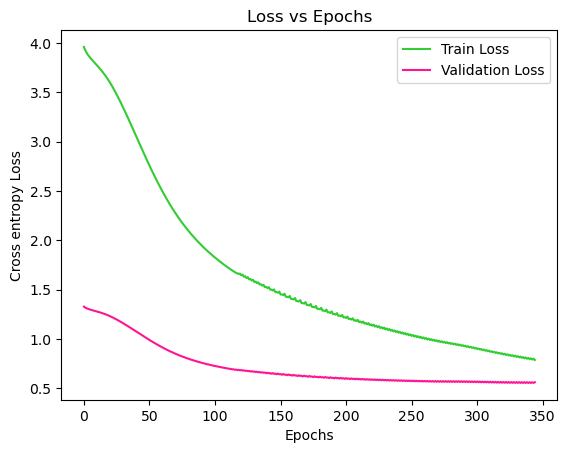

-------------------- 4 capas de [60, 300] nodos --------------------
Accuracy: 0.5710
Cross Entropy: 1.6844


In [106]:
# [60, 300]
importlib.reload(md)
importlib.reload(mt)
m3 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "softmax"], [60, 300], mejoras)
print("-"*20, "4 capas de [60, 300] nodos", "-"*20)
mt.print_acc_ce(m3.forward_pass(X_val, False), y_val,)

Expandimos sobre esta idea

Epoch 0, Loss: 3.916433171276827
loss val: 1.3148263383980674
Epoch 10, Loss: 3.626722978687549
loss val: 1.2365064804716108
Epoch 20, Loss: 3.2612701376350275
loss val: 1.130885135285496
Epoch 30, Loss: 2.8216449202690157
loss val: 0.9984512206718594
Epoch 40, Loss: 2.4365171327717463
loss val: 0.8837220917224786
Epoch 50, Loss: 2.1443719153149243
loss val: 0.7997242195565925
Epoch 60, Loss: 1.9296090649458724
loss val: 0.7402926472866814
Epoch 70, Loss: 1.7969875914427291
loss val: 0.7102080898481612
Epoch 80, Loss: 1.7645638446789078
loss val: 0.7000504083337076
Epoch 90, Loss: 1.6342187758441853
loss val: 0.6700990236719719
Epoch 100, Loss: 1.502293079098266
loss val: 0.6460852511754959
Epoch 110, Loss: 1.4485653888500065
loss val: 0.6334801629538402
Epoch 120, Loss: 1.376046155667951
loss val: 0.6205823437216476
Epoch 130, Loss: 1.3028032132102723
loss val: 0.6082003424781688
Epoch 140, Loss: 1.253504650500262
loss val: 0.599925531868976
Epoch 150, Loss: 1.1793699526187118
loss va

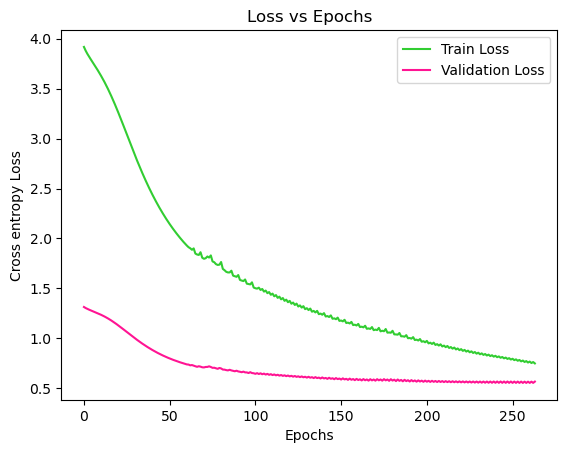

-------------------- 4 capas de [60, 800] nodos --------------------
Accuracy: 0.5900
Cross Entropy: 1.7052


In [107]:
# [60, 800]
importlib.reload(md)
importlib.reload(mt)
m3 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "softmax"], [60, 800], mejoras)
print("-"*20, "4 capas de [60, 800] nodos", "-"*20)
mt.print_acc_ce(m3.forward_pass(X_val, False), y_val,)

Para optimizar tiempo bajamos un poco.

Epoch 0, Loss: 3.934780440217584
loss val: 1.3164007726229547
Epoch 10, Loss: 3.634074146823883
loss val: 1.2397071482875464
Epoch 20, Loss: 3.283539353148169
loss val: 1.1486750876666654
Epoch 30, Loss: 2.8819445144440414
loss val: 1.0344555507964628
Epoch 40, Loss: 2.5172600715701487
loss val: 0.9290599142880256
Epoch 50, Loss: 2.2267820971438796
loss val: 0.8453976752915945
Epoch 60, Loss: 2.0042505173032437
loss val: 0.7832549233667891
Epoch 70, Loss: 1.8331769896918721
loss val: 0.7379256172078233
Epoch 80, Loss: 1.6984854510659846
loss val: 0.7051420636684959
Epoch 90, Loss: 1.6182242579569237
loss val: 0.6923397221803453
Epoch 100, Loss: 1.552428508325225
loss val: 0.6795471739458039
Epoch 110, Loss: 1.4699283306211934
loss val: 0.6654576688689436
Epoch 120, Loss: 1.388265919997278
loss val: 0.6493967618430944
Epoch 130, Loss: 1.325617698497728
loss val: 0.6413474801585995
Epoch 140, Loss: 1.2632513432953045
loss val: 0.6315928889092536
Epoch 150, Loss: 1.2114722806983789
loss v

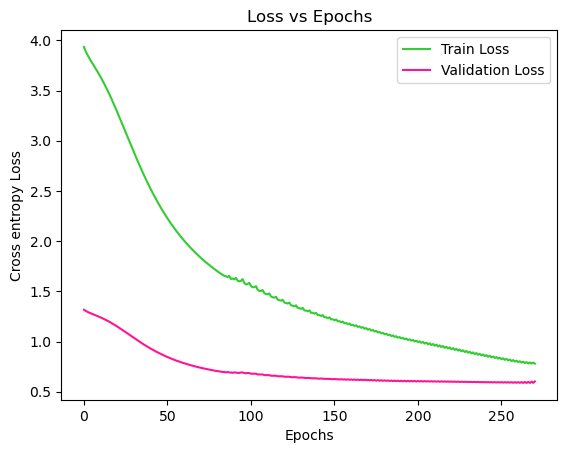

-------------------- 4 capas de [60, 500] nodos --------------------
Accuracy: 0.5420
Cross Entropy: 1.8065


In [108]:
# [60, 500]
importlib.reload(md)
importlib.reload(mt)
m3 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "softmax"], [60, 500], mejoras)
print("-"*20, "4 capas de [60, 500] nodos", "-"*20)
mt.print_acc_ce(m3.forward_pass(X_val, False), y_val,)

Teniendo en cuenta tiempo y performance para el modelo final vamos a usar la red con la arquitectura más compleja que era la de 4 capas con muchos nodos pero, con el fin de optimizar el tiempo, para la elegir los hiperparámetros, vamos a usar una red de una sola capa con 100 nodos para evaluar los hiperparámetros.

Learning Rate: 0.001
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Learning Rate: 0.01
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Learning Rate: 0.1
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Learning Rate: 1.0
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


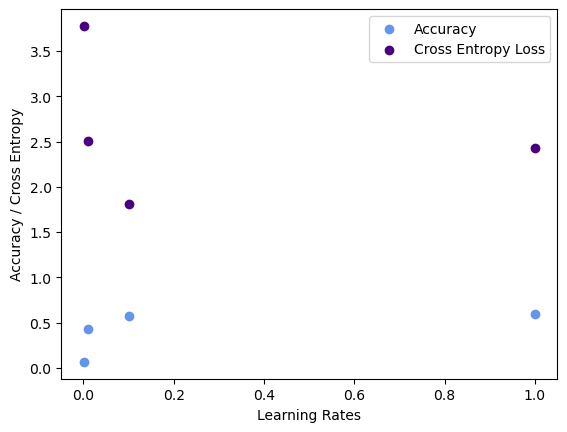

La menor pérdida fue:  1.8147531903371088 correspondiente al learning rate:  0.1


In [109]:
importlib.reload(md)
importlib.reload(aux)
learning_rates = [0.001, 0.01, 0.1, 1.0]
params = [["ReLU", "softmax"], [100], None]

losses_cross_val = aux.cross_validation_lr(X_train, y_train, learning_rates, params)
acc_lr = [x[0] for x in losses_cross_val]
ce_lr = [x[1] for x in losses_cross_val]
best_lr = learning_rates[ce_lr.index(min(ce_lr))]

aux.graph(learning_rates, acc_lr, ce_lr, "Learning rate vs Accuracy and Cross Entropy Loss", "Learning Rates", ["Accuracy", "Cross Entropy Loss"])

print("La menor pérdida fue: ", min(ce_lr), "correspondiente al learning rate: ", best_lr)

### Mejoras independientes
Probamos los mejores parámetros para cada mejoras asumiendo que se usa esa sola con Early stopping.
##### Learning Rate Scheduling
Lineal

hp: 0
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.5666666666666667       avg ce =  1.775848768500373
hp: 1e-05
Avg results: 
                      avg acc =  0.572       avg ce =  1.7642151591644673
hp: 0.0001
Avg results: 
                      avg acc =  0.5663333333333334       avg ce =  1.7853289083040487
hp: 0.001
Avg results: 
                      avg acc =  0.5710000000000001       avg ce =  1.7553936683235527
hp: 0.01
Avg results: 
                      avg acc =  0.562       avg ce =  1.7901022741192592
hp: 0.1
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.5696666666666668       avg ce =  1.7659785190429211


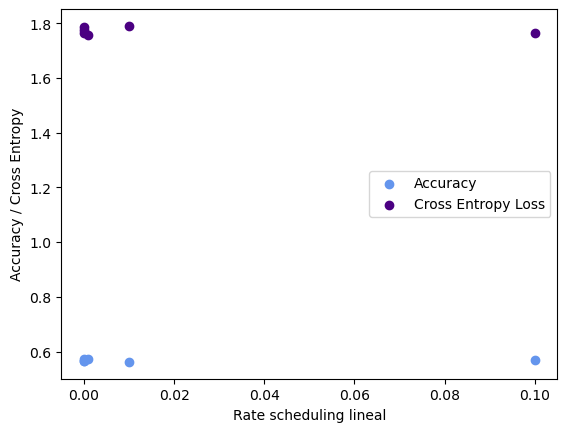

La menor pérdida fue:  1.7553936683235527 correspondiente al lr:  0.001


In [ ]:
importlib.reload(md)
importlib.reload(aux)

stop_crit = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1]
params = [["ReLU", "softmax"], [100], best_lr]

name = ("Rate scheduling lineal")
losses_rsl = aux.cross_validation_mejora(X_train, y_train, name, stop_crit, params)
acc = [x[0] for x in losses_rsl]
ce = [x[1] for x in losses_rsl]
best_stop_crit = stop_crit[ce.index(min(ce))]

aux.graph(stop_crit, acc, ce, "Rate scheduling lineal vs Accuracy and Cross Entropy Loss", "Rate scheduling lineal", ["Accuracy", "Cross Entropy Loss"], scale = 'log')

print("La menor pérdida fue: ", min(ce), "correspondiente al lr: ", best_stop_crit)

Exponencial

hp: 0.5
Avg results: 
                      avg acc =  0.02633333333333333       avg ce =  3.9453255781330063
hp: 0.9
Avg results: 
                      avg acc =  0.056999999999999995       avg ce =  3.78811272297012
hp: 0.99
Avg results: 
                      avg acc =  0.4323333333333334       avg ce =  2.4795524425923547
hp: 0.9999
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.5756666666666665       avg ce =  1.7545748916606776
hp: 1
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.5700000000000001       avg ce =  1.761777382331853


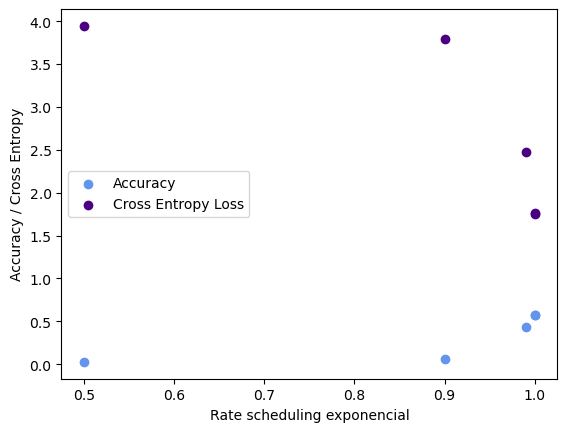

La menor pérdida fue:  1.7545748916606776 correspondiente al decay rate:  0.9999


In [162]:
importlib.reload(md)
importlib.reload(aux)

decay_rates = [0.5, 0.9, 0.99, 0.9999, 1]
params = [["ReLU", "softmax"], [100], best_lr]

name = ("Rate scheduling exponencial")
losses_rse = aux.cross_validation_mejora(X_train, y_train, name, decay_rates, params)
acc = [x[0] for x in losses_rse]
ce = [x[1] for x in losses_rse]
best_dr = decay_rates[ce.index(min(ce))]

aux.graph(decay_rates, acc, ce, "Rate scheduling exponencial vs Accuracy and Cross Entropy Loss", "Rate scheduling exponencial", ["Accuracy", "Cross Entropy Loss"])

print("La menor pérdida fue: ", min(ce), "correspondiente al decay rate: ", best_dr)

### Mini batch stochastic gradient descent
hiperparámetro: batch size

**batch size**
- muy chico --> va a oscliar más y puede diverger
- muy grande --> el lo mismo que no usar sgd

hp: 1
Avg results: 
                      avg acc =  0.29700000000000004       avg ce =  3.7094350206950075
hp: 32
Avg results: 
                      avg acc =  0.5856666666666668       avg ce =  3.1929781534078714
hp: 64
Avg results: 
                      avg acc =  0.5763333333333333       avg ce =  3.1029827115560105
hp: 128
Avg results: 
                      avg acc =  0.5623333333333334       avg ce =  2.875428962223709
hp: 256
Avg results: 
                      avg acc =  0.5693333333333334       avg ce =  2.6940322837533137
hp: 512
Avg results: 
                      avg acc =  0.5716666666666667       avg ce =  2.4532377459015873
hp: 1024
Avg results: 
                      avg acc =  0.5673333333333334       avg ce =  2.2519997427553333


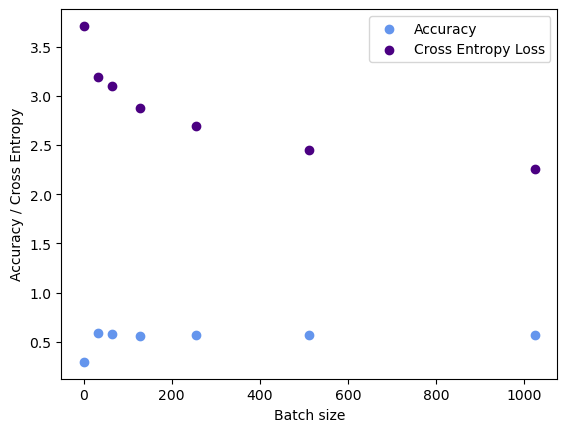

La menor pérdida fue:  2.2519997427553333 correspondiente al batch size:  1024


In [163]:
importlib.reload(md)
importlib.reload(aux)

batch_sizes = [1, 32, 64, 128, 256, 512, 1024]
params = [["ReLU", "softmax"], [100], best_lr]
name = "Mini batch stochastic gradient descent"
losses_sgd = aux.cross_validation_mejora(X_train, y_train, name, batch_sizes, params)
acc = [x[0] for x in losses_sgd]
ce = [x[1] for x in losses_sgd]
best_batch_size = batch_sizes[ce.index(min(ce))]

aux.graph(batch_sizes, acc, ce, "Batch size vs Accuracy and Cross Entropy Loss", "Batch size", ["Accuracy", "Cross Entropy Loss"])

print("La menor pérdida fue: ", min(ce), "correspondiente al batch size: ", best_batch_size)

### ADAM
hiperparámetros: beta1, beta2, epsilon
**beta1** --> momentum (cuanta memoria tiene mi modelo)
**beta2** --> decay rate (bajo puede generar ruido)
**beta3** --> busca estabilidad numérica

hp: [0.9, 0.999, 1e-08]
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.27266666666666667       avg ce =  3.5393988990811396
hp: [0.5, 0.8, 1e-08]
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.33899999999999997       avg ce =  3.7597909410754786
hp: [0.99, 0.99999, 1e-08]
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.2013333333333333       avg ce =  3.5754620657543263
Accuracies:  [0.27266666666666667, 0.33899999999999997, 0.2013333333333333]
CE:  [3.5393988990811396, 3.7597909410754786, 3.5754620657543263]


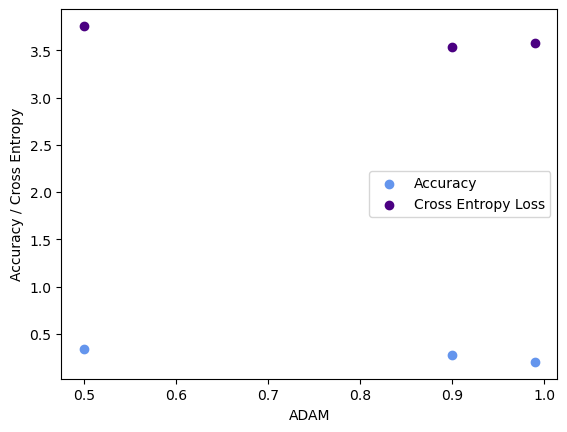

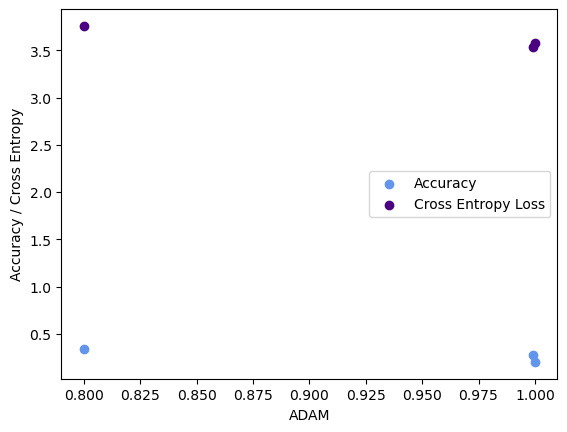

La menor pérdida fue:  3.5393988990811396 correspondiente a los hiperparámetros:  1024


In [164]:
# ADAM sin minibatches
importlib.reload(md)
importlib.reload(aux)
adam_hp = [[0.9, 0.999, 1e-8], [0.5, 0.8, 1e-8], [0.99, 0.99999, 1e-8]]

params = [["ReLU", "softmax"], [100], best_lr]

losses_adam = aux.cross_validation_mejora(X_train, y_train, "ADAM", adam_hp, params)
acc = [x[0] for x in losses_adam]
print("Accuracies: ", acc)
ce = [x[1] for x in losses_adam]
print("CE: ", ce)
best_adam_hp = adam_hp[ce.index(min(ce))]

x_axis1 = [0.9,0.5,0.99]
x_axis2 = [0.999, 0.8, 0.99999]
x_axis3 = [1e-8, 1e-8, 1e-8]
aux.graph(x_axis1, acc, ce, "ADAM vs Accuracy and Cross Entropy Loss", "ADAM", ["Accuracy", "Cross Entropy Loss"])
aux.graph(x_axis2, acc, ce, "ADAM vs Accuracy and Cross Entropy Loss", "ADAM", ["Accuracy", "Cross Entropy Loss"])

print("La menor pérdida fue: ", min(ce), "correspondiente a los hiperparámetros: ", best_batch_size)

### L2
lambda

hp: 0
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.569       avg ce =  1.788464452327163
hp: 0.0001
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.5826666666666667       avg ce =  1.7436564509564085
hp: 0.001
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.5686666666666668       avg ce =  1.7613000944776895
hp: 0.01
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.5700000000000001       avg ce =  1.768758059654827
hp: 0.1
Early stopping triggered
Early stopping triggered
Early stopping tr

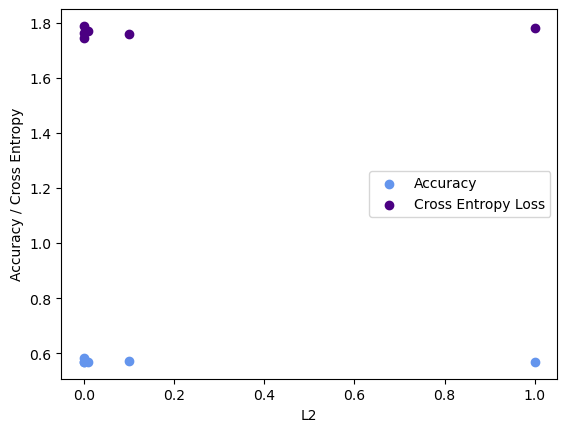

La menor pérdida fue:  1.7436564509564085 correspondiente al lambda:  0.0001


In [165]:
importlib.reload(md)
importlib.reload(aux)

lambdas = [0, 0.0001, 0.001, 0.01, 0.1, 1]

params = [["ReLU", "softmax"], [100], best_lr]
name = "L2"

losses_l2 = aux.cross_validation_mejora(X_train, y_train, name, lambdas, params)
# losses_l2 = [(acc1, ce1), (acc2, ce2), (acc3, ce3), (acc4, ce4), (acc5, ce5)..]
acc = [x[0] for x in losses_l2]
ce = [x[1] for x in losses_l2]

best_l2 = lambdas[ce.index(min(ce))]

aux.graph(lambdas, acc, ce, "L2 vs Accuracy and Cross Entropy Loss", "L2", ["Accuracy", "Cross Entropy Loss"])

print("La menor pérdida fue: ", min(ce), "correspondiente al lambda: ", best_l2)

### Dropout
Dropout rate

hp: 0
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.5683333333333334       avg ce =  1.745301853304954
hp: 0.0001
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.5623333333333334       avg ce =  1.782339150401833
hp: 0.001
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.5736666666666667       avg ce =  1.7462954787430438
hp: 0.01
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.567       avg ce =  1.7538168837287667
hp: 0.1
Early stopping triggered
Early stopping triggered
Early stopping tr

c:\Users\felic\OneDrive\Documentos\GitHub\MLyDL_TPs\Marolda_Felicitas_TP3\src\models.py:147: RuntimeWarning: invalid value encountered in divide
  dropout_masks[i] = (mask, rate)


Avg results: 
                      avg acc =  0.020333333333333335       avg ce =  nan


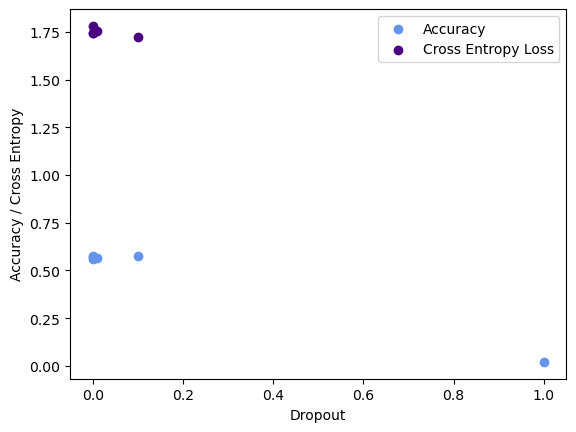

La menor pérdida fue:  1.7236384480245377 correspondiente al dropout rate:  0.1


In [166]:
importlib.reload(md)
importlib.reload(aux)

dropoutRates = [0, 0.0001, 0.001, 0.01, 0.1, 1]

params = [["ReLU", "softmax"], [100], best_lr]
name = "Dropout"

losses_dropout = aux.cross_validation_mejora(X_train, y_train, name, dropoutRates, params)
acc_d = [x[0] for x in losses_dropout]
ce_d = [x[1] for x in losses_dropout]
best_dr = dropoutRates[ce_d.index(min(ce_d))]

aux.graph(dropoutRates, acc_d, ce_d, "Dropout vs Accuracy and Cross Entropy Loss", "Dropout", ["Accuracy", "Cross Entropy Loss"])

print("La menor pérdida fue: ", min(ce_d), "correspondiente al dropout rate: ", best_dr)

### Combinaciones de mejoras

Ahora que obtuvimos de manera greedy los mejores hiperparámetros para cada mejora, vamos a probar combinaciones de mejoras.

In [167]:
importlib.reload(md)
importlib.reload(aux)

# [Mini-batch SGD] + [ADAM] + [Regularización L2] + [Early stopping] + [Exponential LR schedule]
mejoras1 = {
    "Mini batch stochastic gradient descent": best_batch_size,
    "ADAM": best_adam_hp,
    "L2": best_l2,
    "Early stopping": 5,
    "Rate scheduling exponencial": best_dr
}
params = [["ReLU", "ReLU", "softmax"], [200, 250, 300, 500], best_lr, mejoras1]

results1, avg_acc1, avg_ce1 = aux.cross_validation(X_train, y_train, params)
print("La accuracy promedio fue:", avg_acc1)
print("La cross-entropy promedio fue:", avg_ce1)

IndexError: list index out of range

In [ ]:
importlib.reload(md)
importlib.reload(aux)

# [Mini-batch SGD] + [ADAM] + [Dropout] + [Early stopping] + [Exponential LR schedule]
mejoras2 = {
    "Mini batch stochastic gradient descent": best_batch_size,
    "ADAM": best_adam_hp,
    "L2": best_l2,
    "Dropout": best_dr,
    "Early stopping": 5,
    "Rate scheduling exponencial": best_dr
}
params = [["ReLU", "ReLU", "softmax"], [200, 250, 300, 500], best_lr, mejoras2]

results2, avg_acc2, avg_ce2 = aux.cross_validation(X_train, y_train, params)
print("La accuracy promedio fue:", avg_acc2)
print("La cross-entropy promedio fue:", avg_ce2)

In [ ]:
importlib.reload(md)
importlib.reload(aux)

# [Dropout] + [Early stopping] + [Exponential LR schedule]
mejoras3 = {
    "Early stopping": 5,
    "Dropout": best_dr,
    "Rate scheduling exponencial": best_dr
}
params = [["ReLU", "ReLU", "softmax"], [200, 250, 300, 500], best_lr, mejoras3]

results3, avg_acc3, avg_ce3 = aux.cross_validation(X_train, y_train, params)
print("La accuracy promedio fue:", avg_acc3)
print("La cross-entropy promedio fue:", avg_ce3)

In [ ]:
# elegimos el m1 que dio las mejores losses
importlib.reload(md)
importlib.reload(mt)

best_acc = np.max(avg_acc1, avg_acc2, avg_acc3)
best_ce = np.min(avg_ce1, avg_ce2, avg_ce3)
print("La mejor accuracy fue:", best_acc, "con el modelo ", np.argmax([avg_acc1, avg_acc2, avg_acc3]))
print("La mejor cross-entropy fue:", best_ce, "con el modelo ", np.argmin([avg_ce1, avg_ce2, avg_ce3]))

# usamos cross entropy
best_model = np.argmin([avg_ce1, avg_ce2, avg_ce3])
best_params = [mejoras1, mejoras2, mejoras3][best_model]
m1 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "softmax"], [200, 250, 300, 500], best_params)
mt.print_acc_ce(m1.forward_pass(X_val, False), y_val)

# 4) Desarrollo de una Red Neuronal con PyTorch

In [ ]:
import pyTorch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

Utilizando PyTorch, entrenar una red neuronal con la arquitectura y los hiperparámetros hallados en el ejercicio anterior. Llmaremos a este modelo M2

In [ ]:
# TEMPORAL
best_params = {
    "Mini batch stochastic gradient descent": 1000,
    "ADAM": (0.9, 0.999, 1e-8),
    "L2": 0.01,
    "Dropout": 0.9,
    "Early stopping": 50,
    "Rate scheduling exponencial": 0.9
}

Epoch 0, Loss: 207.6425, Val Loss: 3.9232
Epoch 10, Loss: 8.3994, Val Loss: 3.8969
Epoch 20, Loss: 3.8783, Val Loss: 3.8975
Epoch 30, Loss: 3.8774, Val Loss: 3.8976
Epoch 40, Loss: 3.9400, Val Loss: 3.8975
Epoch 50, Loss: 3.8773, Val Loss: 3.8975
Epoch 60, Loss: 3.8773, Val Loss: 3.8975
Early stopping triggered at epoch 61


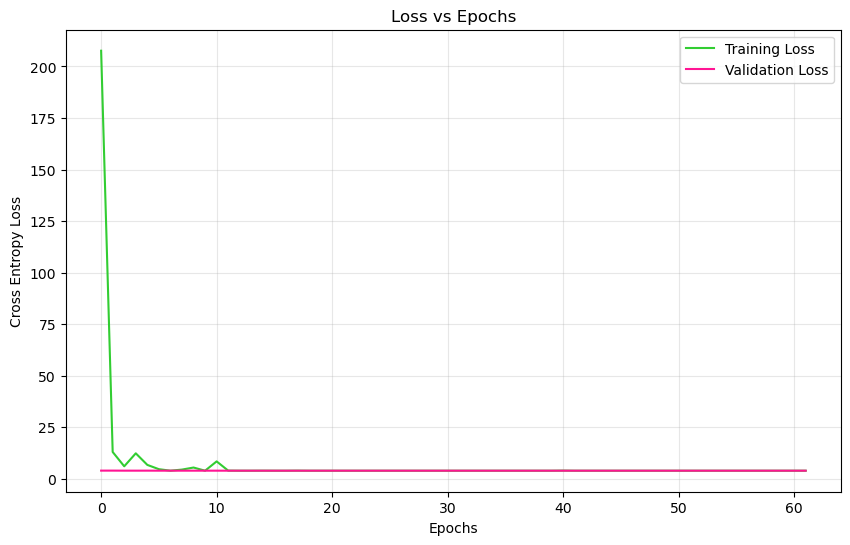

Accuracy: 0.0230
Cross Entropy: 3.8858


In [ ]:
importlib.reload(md)
importlib.reload(mt)

mejoras = best_params.copy()
hidden_layers = [200, 250, 300, 500]
input_size = X_train.shape[1]
output_size = len(np.unique(y_train))
# Instanciamos el modelo
model = md.NNTorch(
    input_size=input_size,
    hidden_layers=hidden_layers,
    output_size=output_size,
    mejora=mejoras
)

# Entrenamos
model.fit(
    X=X_train,  # Datos de entrenamiento (numpy array o tensor)
    y=y_train,  # Etiquetas (numpy array o tensor)
    X_val=X_val,  # Datos de validación (opcional)
    y_val=y_val,  # Etiquetas de validación (opcional)
    learning_rate=best_lr,
    epochs=500,  # Número máximo de épocas
    batch_size=best_batch_size,
    graph=True  # Para mostrar gráfica de pérdida
)

# Predicciones en test (si tienes datos de prueba)
y_pred = model.predict_class(X_test)
probs = model.predict_proba(X_test)

mt.print_acc_ce(probs, y_test)